## Installing TensorFlow and Keras

Before starting the installation, it is important to note the computation units that TensorFlow could use on your machine. You have two options for running your TensorFlow code: you can use the central processing unit (CPU), or you can use the graphics processing unit (GPU).

Because GPUs can run linear matrix operations faster than CPUs, data scientists usually prefer to use GPUs when they're available. But although training deep-learning models on GPUs is way faster than training them on CPUs, accessing GPUs can be costly. The easiest solution for training your models on a GPU is to use Google Colaboratory, which offers free GPUs. That being said, the TensorFlow code that you'll write will be the same regardless of the underlying computational unit.

Now, start with the installation of TensorFlow. In doing so, you can make use of Python's pip package manager. If you'd like to install the CPU version of TensorFlow, then just run this command on your terminal:

```bash
pip install tensorflow==2.0.0-rc1
```

However, if you'd like to use GPU version of TensorFlow, you should run the following:

```bash
pip install tensorflow-gpu==2.0.0-rc1
```

When you install TensorFlow, Keras comes bundled with it. So, you don't need to install Keras separately.

## Basics of Keras

To define and run a deep-learning model, Keras offers three different options:

* The sequential API
* The functional API
* Model subclassing

Throughout this module, you'll make use of the sequential API because it offers the easiest way to define and run a deep-learning model. With the other two methods, you could write some more sophisticated deep-learning architectures. But for the purposes of this module, the sequential API offers more than enough. You can import it in your code as follows:

```python
from tensorflow.keras.models import Sequential
```

As you'll see shortly, you'll build your ANN step by step, using the `Sequential()` class.

## Implementing a basic ANN model

It's quite easy to build a deep-learning model using the sequential API from Keras. Remember that deep-learning models consist of layers stacked on top of each other; for example, the second layer comes after the first layer, the third layer comes after the second layer, and so on. Keras mimics this sequential structure of the deep-learning model when implementing them programmatically.

When implementing an ANN in Keras, you'll use the following steps:

1. Create a `model` object.
2. Add layers to the model one by one.

After doing these steps, you'll end up with a deep-learning model structure. The next steps are as follows:

1. Define an optimizer and compile the model.
2. After compiling the model, train the model using training data.
3. Evaluate the performance of the model on a test set.

The figure below sketches the steps for implementing a deep-learning model in Keras:

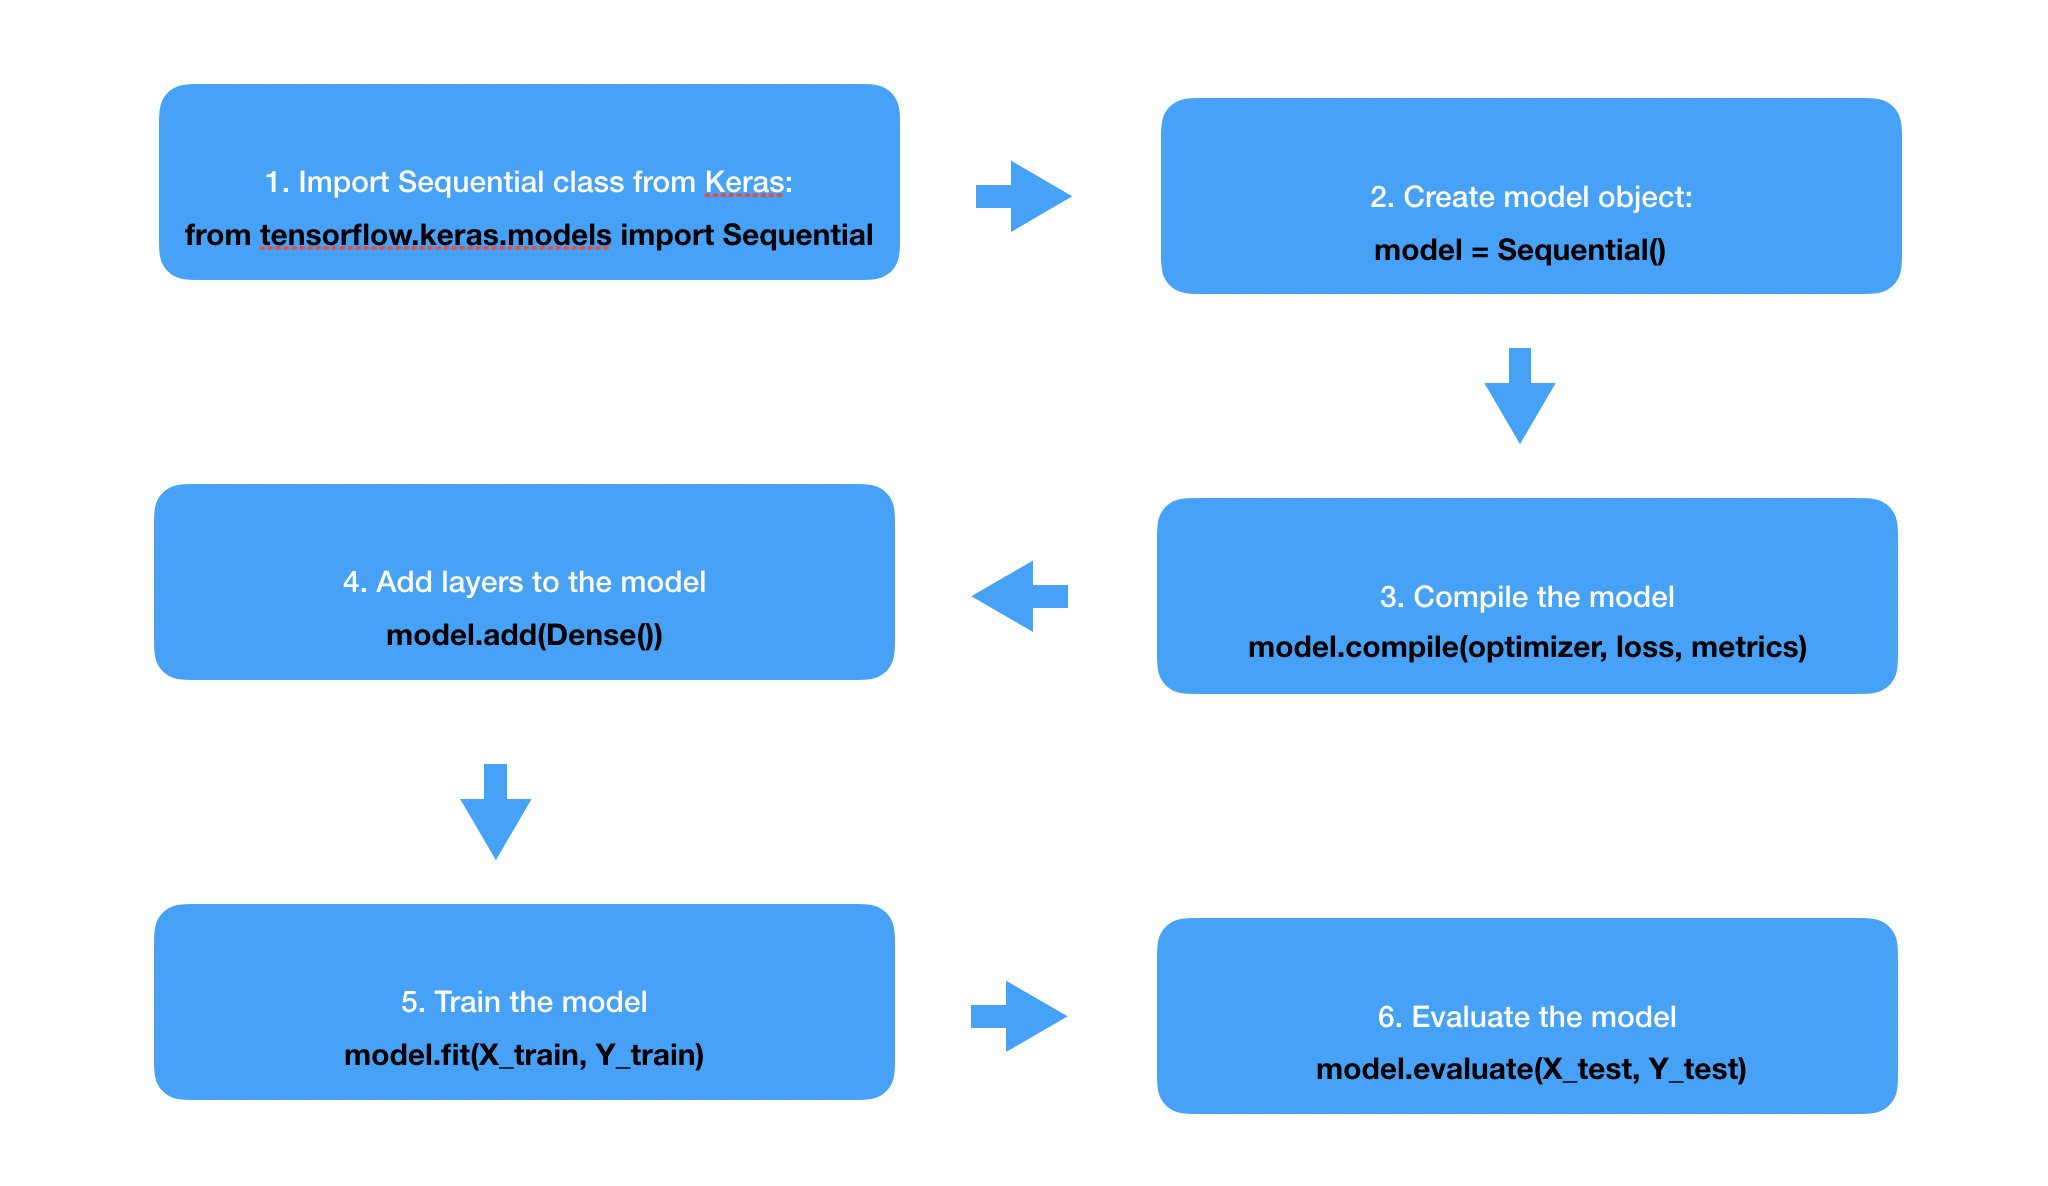

That's all! Next, get familiar with the dataset that you'll be using in this lesson. Then, you'll implement your model using Keras.

### Dataset

Throughout this module, you'll be using a famous optical character recognition dataset called *MNIST*. This dataset consists of 70,000 grayscale images of handwritten digits. *MNIST* is a classic dataset for deep-learning research and education, and that's why it was chosen for this module. In the following, you'll load the dataset and do some data preprocessing. As you'll see shortly, each image is represented as 28x28 pixel data. This is a two-dimensional vector. You'll convert this to a vector of length 784, which will be single-dimensional. You'll also normalize each vector by dividing each element by 255 (which is the maximum value of the RGB color scale).

Load the *MNIST* dataset using the `mnist` class from the `keras.datasets` module. In order to do that, import it as shown below.

**Note:** You don't have to use this method to download the *MNIST* dataset. It's [available online](http://yann.lecun.com/exdb/mnist/). You can also download the dataset from that link and then load it your own way. Notice that the dataset in the link is separated into two (as training and test sets).

In [1]:
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.datasets import mnist

Then, load the data and do the preprocessing:

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# assert X_train.shape == (60000, 28, 28)
# assert X_test.shape == (10000, 28, 28)
# assert y_train.shape == (60000,)
# assert y_test.shape == (10000,)

input_dim = 784  # 28*28
output_dim = nb_classes = 10
batch_size = 128                                                                # Batch size refers to the number of training instances in the batch.
nb_epoch = 20                                                                   # For example, batch_size=128 means that there are 128 training instances in each batch.

X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Next, *one-hot code* your *target variable* using the `to_categorical()` function from the `keras.utils` module:

In [6]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

Now, check the size of the dataset:

In [7]:
X_train[0].shape

(784,)

As you can see, the size of each image is 784. In fact, all images in *MNIST* are 28 by 28 pixels, and 784 is just the result of multiplying 28 by 28. So, the data that you have is a flattened version of the images, where each row in the 28 x 28 matrix is concatenated side by side.

Now, plot some images and see what they look like:

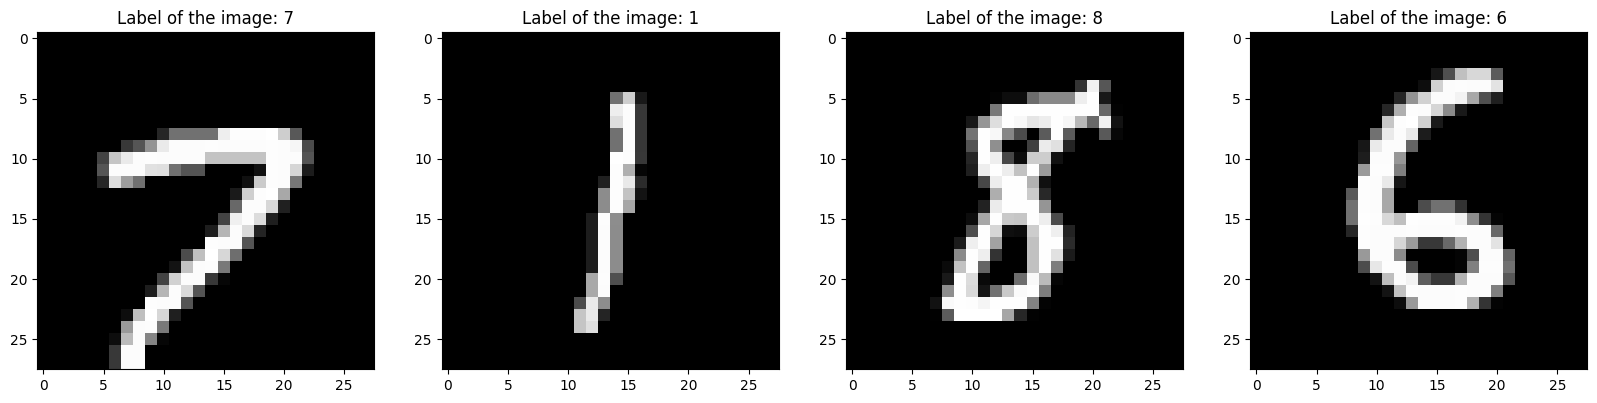

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

plt.subplot(141)
plt.imshow(X_train[123].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[123]))

plt.subplot(142)
plt.imshow(X_train[124].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[124]))

plt.subplot(143)
plt.imshow(X_train[125].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[125]))

plt.subplot(144)
plt.imshow(X_train[126].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[126]))

plt.show()

You're now ready to jump into building the ANN model.

### Defining the model

As mentioned before, you'll build your model using the `Sequential()` class of the `keras.models` module. First, create your model as follows:
```python
model = Sequential()
```
Then you can start to add layers to your `model` object one by one (that is, sequentially). The layer type that you'll use is called the dense layer, and you can import it from the `keras.layers` module.

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
# The first dense layer
model.add(Dense(1028, input_shape=(784,), activation="relu"))
# The second dense layer
model.add(Dense(1028, activation="relu"))
# The last layer is the output layer
model.add(Dense(10, activation="softmax"))

Note that above, the neuron size of the output layer is set to `10`. This is because *MNIST* has 10 classes. The code also sets the activation function of the output layer to `softmax`. Later, you'll explore why softmax is used as the activation function in the output layer. But for now, know that when you give an image as an input to the model, your model will produce 10 probabilities for each of the 10 classes in the *MNIST* data. The largest probability class will be the prediction of the model.

You can look at the structure of your ANN model using the `summary()` method of your `model` object:

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1028)              806980    
                                                                 
 dense_1 (Dense)             (None, 1028)              1057812   
                                                                 
 dense_2 (Dense)             (None, 10)                10290     
                                                                 
Total params: 1875082 (7.15 MB)
Trainable params: 1875082 (7.15 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


As you can see, you have three dense layers, and the last one is the output layer. In total, there are 1,875,082 parameters to be estimated in the model.

### Compiling the model

Now you can compile your model. When compiling the model, define three things:

1. **The optimizer that will be used in the training:** If you don't know about optimizers in deep learning, don't worry. You just need to use one in this lesson, and you'll learn about optimizers later in this module.
2. **The loss function:** It's necessary to specify a loss function for a model. Training algorithms use this loss function and try to minimize it during the training. This will also be covered in the next lesson.
3. **The metric to measure the training performance of your model:** In this example, you use the accuracy metric, because your task is a classification task and your dataset is a balanced one.

In [12]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

You're now ready to train the model. Training a model in Keras is done by calling the `fit()` method of the `model` object. In the following, you train your model using the following specifications:

* Use `128` as the batch size. *Batch size* is something that you'll explore in a later lesson.
* Use `20` as the number of epochs. In deep-learning jargon, *epoch* means full use of all of the examples in the training data during the training of the model. So, you'll train your model during 20 epochs, which means that you'll use all of the observations in your training data 20 times when training your model.

In [13]:
# Setting `verbose=1` prints out some results after each epoch
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 4s 5ms/step - loss: 1.0431 - accuracy: 0.7809
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4330 - accuracy: 0.8884
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3469 - accuracy: 0.9042
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.3079 - accuracy: 0.9141
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2821 - accuracy: 0.9207
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2628 - accuracy: 0.9254
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2471 - accuracy: 0.9304
Epoch 8/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2336 - accuracy: 0.9344
Epoch 9/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2218 - accuracy: 0.9377
Epoch 10/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2113 - accuracy: 0.9404

Wow! The model achieved almost 97% accuracy in the training set.

### Evaluating the model

The last step is to evaluate the model using the test set that you set apart before. For this purpose, use the `evaluate()` method of the `model` object.

In [14]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.14607207477092743
Test accuracy: 0.9577999711036682


The test set accuracy of the model is almost 96%.